In [7]:
#import modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=CB_color_cycle)

rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{gensymb}')
#!python numbers=disable
fig_width_pt = 1000  # Get this from LaTeX using \showthe\columnwidth result: 
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'legend.fontsize': 10,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)
mpl.rcParams["font.family"] = ["Latin Modern Roman"]
plt.rcParams['path.simplify'] = True
print("\nFinished importing modules!\n")


Finished importing modules!



In [8]:
#plot time sequence for assignment no. 2
data_seq_1 = np.array([1, 1, 1, 1])
data_seq_2 = np.array([1, -1, -1, -1])
data_seq_3 = np.array([-1, -1])
data_seq_list = [data_seq_1,data_seq_2,data_seq_3]

#define chosen OSVF sequences
osvf_seq_1 = np.array([1,1,1,1])
osvf_seq_2 = np.array([1,1,-1,-1])
osvf_seq_3 = np.array([1,-1,1,-1,1,-1,1,-1])
osvf_seq_list = [osvf_seq_1,osvf_seq_2,osvf_seq_3]

#gen chip sequence
out_seq_list = list()
for idx, tmp_list in enumerate(data_seq_list):
   out_seq_list.append((np.dot(data_seq_list[idx][np.newaxis].T,osvf_seq_list[idx][np.newaxis])).flatten())
    
#sum out seq 
chip_len = len(data_seq_1)*len(data_seq_1)
summed_sig = np.zeros(chip_len)
for tmp_list in out_seq_list:
    summed_sig += np.array(tmp_list)

#decode
decoded_seq_list = list()
for idx, tmp_list in enumerate(out_seq_list):
    n_tile = int(len(summed_sig)/len(osvf_seq_list[idx]))
    decoded_seq_list.append(np.multiply(summed_sig,np.tile(osvf_seq_list[idx],n_tile)))

#integrate
integrated_data = list()
for idx, tmp_list in enumerate(decoded_seq_list):
    bit_len = len(decoded_seq_list[idx])/len(osvf_seq_list[idx])
    samp_block_l = np.split(decoded_seq_list[idx],bit_len)
    integrated_seq = np.zeros(int(bit_len))
    for bit_idx, samp_block in enumerate(samp_block_l):
       #round ~ integrator decision 
       integrated_seq[bit_idx] =np.where((np.sum(samp_block)/len(osvf_seq_list[idx])) > 0.0, 1, -1)
    integrated_data.append(integrated_seq)


#upsample to get uniform time base
time_base = np.arange(0,(chip_len+1),1)

for idx, tmp_list in enumerate(osvf_seq_list):
    n_tile = int(chip_len/len(osvf_seq_list[idx]))
    osvf_seq_list[idx] = np.tile(osvf_seq_list[idx],n_tile)

for idx, tmp_list in enumerate(data_seq_list):
    n_upsample = int(chip_len/len(data_seq_list[idx]))
    data_seq_list[idx] = np.repeat(data_seq_list[idx],n_upsample)

for idx, tmp_list in enumerate(integrated_data):
    n_upsample = int(chip_len/len(integrated_data[idx]))
    integrated_data[idx] = np.repeat(integrated_data[idx],n_upsample)

plt.figure(figsize=(10,5))
plt.title("Combined signal")
plt.xlabel("Time[]")
plt.step(time_base, np.append(summed_sig,summed_sig[len(summed_sig)-1]), where='post')
plt.tight_layout()
plt.savefig("assignment2_1.pdf",dpi=300)
plt.show()

plt.figure()
fig, ax = plt.subplots(3,5)
for idx, row in enumerate(ax):
    row[0].step(time_base, np.append(data_seq_list[idx],data_seq_list[idx][len(data_seq_list[idx])-1]), where='post')
    row[0].set_ylim(-1.1,1.1)
    row[0].set_xlim([0,chip_len])

    row[1].step(time_base, np.append(osvf_seq_list[idx],osvf_seq_list[idx][len(osvf_seq_list[idx])-1]), where='post')
    row[1].set_ylim(-1.1,1.1)
    row[1].set_xlim([0,chip_len])

    row[2].step(time_base, np.append(out_seq_list[idx],out_seq_list[idx][len(out_seq_list[idx])-1]), where='post')
    row[2].set_ylim(-1.1,1.1)
    row[2].set_xlim([0,chip_len])

    row[3].step(time_base, np.append(decoded_seq_list[idx],decoded_seq_list[idx][len(decoded_seq_list[idx])-1]), where='post')
    row[3].set_ylim([-3.5,3.5])
    row[3].set_xlim([0,chip_len])

    row[4].step(time_base, np.append(integrated_data[idx],integrated_data[idx][len(integrated_data[idx])-1]), where='post')
    row[4].set_ylim(-1.1,1.1)
    row[4].set_xlim([0,chip_len])



plt.rcParams['axes.grid'] = True

ax[0, 0].set_title("Data input")
ax[0, 1].set_title("OVSF sequence")
ax[0, 2].set_title("Output")
ax[0, 3].set_title("Decoded")
ax[0, 4].set_title("Integrated")


ax[0,0].set(ylabel='A')
ax[1,0].set(ylabel='B')
ax[2,0].set(ylabel='C')

plt.tight_layout()
plt.savefig("assignment2_2.pdf",dpi=300)
plt.show()



KeyboardInterrupt: 

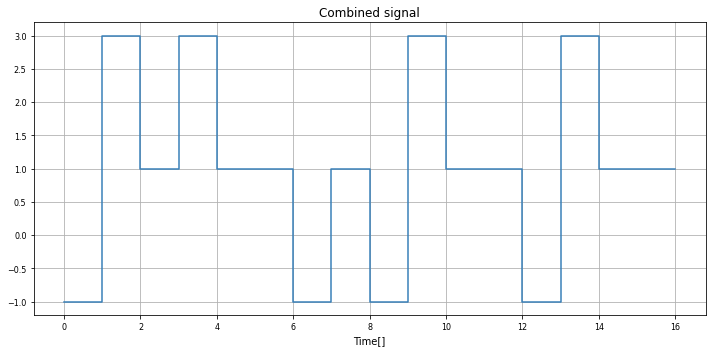

<Figure size 996.264x615.725 with 0 Axes>

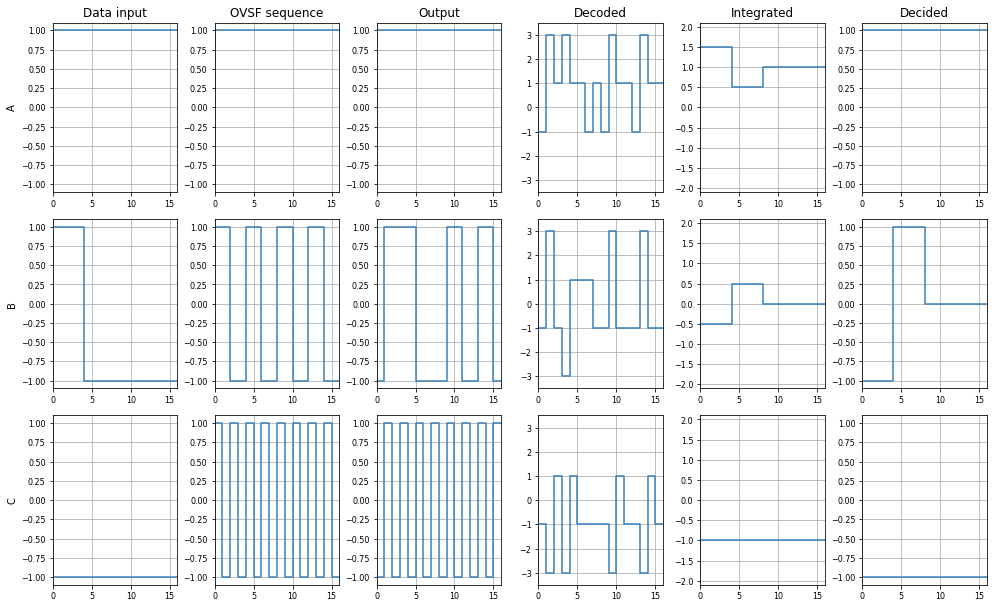

In [3]:
#plot time sequence for assignment no. 2 with shift for 2 usr 3 chips to right
data_seq_1 = np.array([1, 1, 1, 1])
data_seq_2 = np.array([1, -1, -1, -1])
data_seq_3 = np.array([-1, -1])
data_seq_list = [data_seq_1,data_seq_2,data_seq_3]

#define chosen OSVF sequences
osvf_seq_1 = np.array([1,1,1,1])
osvf_seq_2 = np.array([1,1,-1,-1])
osvf_seq_3 = np.array([1,-1,1,-1,1,-1,1,-1])
osvf_seq_list = [osvf_seq_1,osvf_seq_2,osvf_seq_3]

#gen chip sequence
out_seq_list = list()
for idx, tmp_list in enumerate(data_seq_list):
   out_seq_list.append((np.dot(data_seq_list[idx][np.newaxis].T,osvf_seq_list[idx][np.newaxis])).flatten())

#shift usr2 signal 3 chips to the right (cyclic shift - roll)
out_seq_list[1] = np.roll(out_seq_list[1],3)


#sum out seq 
chip_len = len(data_seq_1)*len(data_seq_1)
summed_sig = np.zeros(chip_len)
for tmp_list in out_seq_list:
    summed_sig += np.array(tmp_list)

#decode
decoded_seq_list = list()
for idx, tmp_list in enumerate(out_seq_list):
    n_tile = int(len(summed_sig)/len(osvf_seq_list[idx]))
    decoded_seq_list.append(np.multiply(summed_sig,np.tile(osvf_seq_list[idx],n_tile)))

#integrate
integrated_data = list()
decided_data = list()
for idx, tmp_list in enumerate(decoded_seq_list):
    bit_len = len(decoded_seq_list[idx])/len(osvf_seq_list[idx])
    samp_block_l = np.split(decoded_seq_list[idx],bit_len)
    integrated_seq = np.zeros(int(bit_len))
    decided_seq = np.zeros(int(bit_len))
    for bit_idx, samp_block in enumerate(samp_block_l):
       #integrator decision 
       integrated_seq[bit_idx] = (np.sum(samp_block)/len(osvf_seq_list[idx]))
       if( integrated_seq[bit_idx] >= 0.5):
          decided_seq[bit_idx] = 1
       elif(integrated_seq[bit_idx] <= -0.5):
           decided_seq[bit_idx] = -1
       else:
           decided_seq[bit_idx] = 0
    integrated_data.append(integrated_seq)
    decided_data.append(decided_seq)


#upsample to get uniform time base
time_base = np.arange(0,(chip_len+1),1)

for idx, tmp_list in enumerate(osvf_seq_list):
    n_tile = int(chip_len/len(osvf_seq_list[idx]))
    osvf_seq_list[idx] = np.tile(osvf_seq_list[idx],n_tile)

for idx, tmp_list in enumerate(data_seq_list):
    n_upsample = int(chip_len/len(data_seq_list[idx]))
    data_seq_list[idx] = np.repeat(data_seq_list[idx],n_upsample)

for idx, tmp_list in enumerate(integrated_data):
    n_upsample = int(chip_len/len(integrated_data[idx]))
    integrated_data[idx] = np.repeat(integrated_data[idx],n_upsample)

for idx, tmp_list in enumerate(decided_data):
    n_upsample = int(chip_len/len(decided_data[idx]))
    decided_data[idx] = np.repeat(decided_data[idx],n_upsample)

plt.figure(figsize=(10,5))
plt.title("Combined signal")
plt.xlabel("Time[]")
plt.step(time_base, np.append(summed_sig,summed_sig[len(summed_sig)-1]), where='post')
plt.tight_layout()
plt.savefig("assignment3_1.pdf")
plt.show()

plt.figure()
fig, ax = plt.subplots(3,6)
for idx, row in enumerate(ax):
    row[0].step(time_base, np.append(data_seq_list[idx],data_seq_list[idx][len(data_seq_list[idx])-1]), where='post')
    row[0].set_ylim(-1.1,1.1)
    row[0].set_xlim([0,chip_len])

    row[1].step(time_base, np.append(osvf_seq_list[idx],osvf_seq_list[idx][len(osvf_seq_list[idx])-1]), where='post')
    row[1].set_ylim(-1.1,1.1)
    row[1].set_xlim([0,chip_len])

    row[2].step(time_base, np.append(out_seq_list[idx],out_seq_list[idx][len(out_seq_list[idx])-1]), where='post')
    row[2].set_ylim(-1.1,1.1)
    row[2].set_xlim([0,chip_len])

    row[3].step(time_base, np.append(decoded_seq_list[idx],decoded_seq_list[idx][len(decoded_seq_list[idx])-1]), where='post')
    row[3].set_ylim([-3.5,3.5])
    row[3].set_xlim([0,chip_len])

    row[4].step(time_base, np.append(integrated_data[idx],integrated_data[idx][len(integrated_data[idx])-1]), where='post')
    row[4].set_ylim(-2.1,2.1)
    row[4].set_xlim([0,chip_len])

    row[5].step(time_base, np.append(decided_data[idx],decided_data[idx][len(decided_data[idx])-1]), where='post')
    row[5].set_ylim(-1.1,1.1)
    row[5].set_xlim([0,chip_len])

plt.rcParams['axes.grid'] = True

ax[0, 0].set_title("Data input")
ax[0, 1].set_title("OVSF sequence")
ax[0, 2].set_title("Output")
ax[0, 3].set_title("Decoded")
ax[0, 4].set_title("Integrated")
ax[0, 5].set_title("Decided")


ax[0,0].set(ylabel='A')
ax[1,0].set(ylabel='B')
ax[2,0].set(ylabel='C')

plt.tight_layout()
plt.savefig("assignment3_2.pdf")
plt.show()



Data rates Rb: [4 4 2]
Spreading factors SFX: [4 4 8]

        ________1________
       /                 \
    __2___             ___3___
   /      \           /       \
  4       _5        _6        _7
 / \     /  \      /  \      /  \
8   9   10   11   12   13   14   15

SF value: 4.0

  ________1________
 /                 \
2___             ___3___
    \           /       \
    _5        _6        _7
   /  \      /  \      /  \
  10   11   12   13   14   15

SF value: 4.0

  1________
 /         \
2        ___3___
        /       \
      _6        _7
     /  \      /  \
    12   13   14   15

SF value: 8.0

  1_____
 /      \
2     ___3___
     /       \
    6        _7
     \      /  \
      13   14   15

Assigned OVSF codes: [array([1, 1, 1, 1]), array([ 1,  1, -1, -1]), array([ 1, -1,  1, -1,  1, -1,  1, -1])]
Generated random bipolar sequences: [array([ 1, -1, -1,  1]), array([ 1,  1,  1, -1]), array([ 1, -1])]


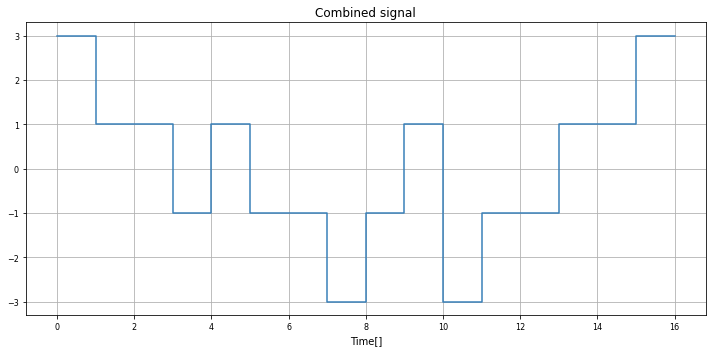

<Figure size 996.264x615.725 with 0 Axes>

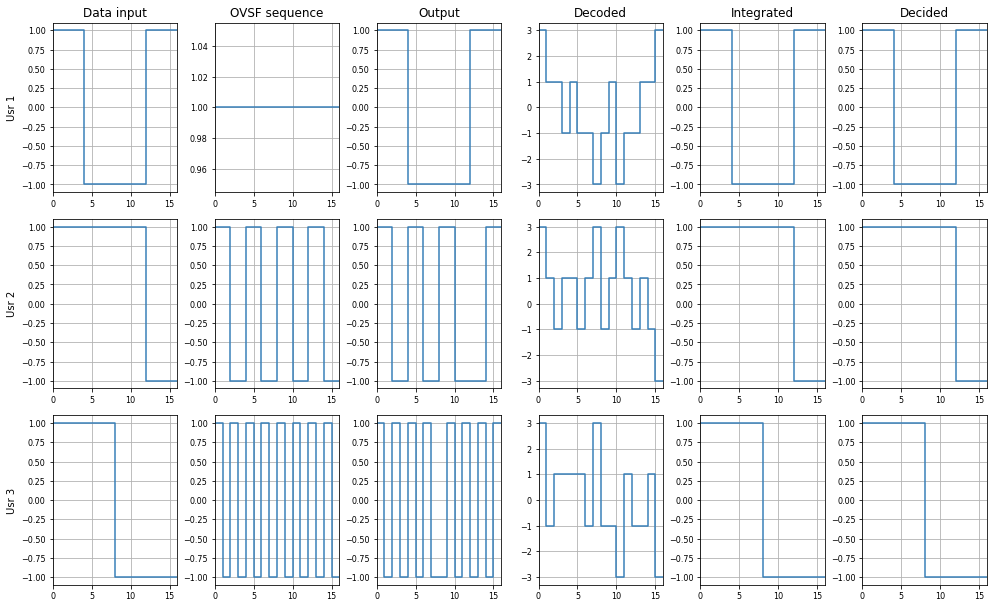

In [12]:
#DSS simulation
import binarytree as tree

#functions 
def gen_random_bipol_seq(len):
   return np.where(np.random.randint(2, size=(len,))<1, -1,1)

def gen_ovsf(ovsf_sf, code_index):
    #OVSF generation is based on: https://github.com/kit-cel/gr-lpwan/blob/494996a04c8c460fbf386299eed2abed2696c53b/python/dsss_phy.py#L140
    ovsf_code = np.array([1], dtype=np.uint8)

    if (ovsf_sf == 1):
        return ovsf_code
    r_max = int(np.log2(ovsf_sf))
    code_index_binary = np.binary_repr(code_index, width=r_max)

    for r in range(r_max):
        if code_index_binary[r] == '0':
            ovsf_code = np.append(ovsf_code, ovsf_code)
        else:
            ovsf_code = np.append(ovsf_code, ovsf_code ^ 1)
    
    return np.where(1 - ovsf_code > 0, -1, 1)

def assign_osvf_seq(sf_val_list):
    #build tree
    idx_vals = np.arange(1,np.power(2,max(np.log2(sf_val_list))+1),1,dtype=np.int32).tolist()
    ovsf_tree = tree.build(idx_vals)
    print(ovsf_tree)

    sf_seq = list()
    for sf_val in sf:
        print("SF value:",sf_val)
        tree_filt = np.array(list(filter(None,ovsf_tree.values)))
        #print("Tree vals:",tree_filt)
        idx_min = sf_val
        idx_max = 2*sf_val - 1
        #print("Idx min max",idx_min,idx_max)
        range_of_vals = result = tree_filt[(tree_filt>=idx_min)*(tree_filt<=idx_max)] 
        #print("Range of vals:",range_of_vals)
        min_sel = np.min(range_of_vals)
        sf_seq.append(gen_ovsf(int(sf_val),int(min_sel-sf_val)))
        #print("Min seel",min_sel-sf_val)
        del ovsf_tree[int(min_sel-1)]
        print(ovsf_tree)
    return sf_seq

def gen_chipped_seqences(data_seq,osvf_seq):
    out_seq_list = list()
    for idx, tmp_list in enumerate(data_seq_list):
         out_seq_list.append((np.dot(data_seq[idx][np.newaxis].T,osvf_seq[idx][np.newaxis])).flatten())
    return out_seq_list
   

def sum_signals(sig_list):
    summed_sig = np.zeros(int(w_rate))
    for tmp_list in sig_list:
        summed_sig += np.array(tmp_list)
    return np.array(summed_sig)

def decode_signals(out_seq_list):
    decoded_seq_list = list()
    for idx, tmp_list in enumerate(out_seq_list):
        n_tile = int(len(summed_sig)/len(osvf_seq_list[idx]))
        decoded_seq_list.append(np.multiply(summed_sig,np.tile(osvf_seq_list[idx],n_tile)))
    return decoded_seq_list

def integrate_and_decide(decoded_seq_list,osvf_seq_list):
    integrated_data = list()
    decided_data = list()
    for idx, tmp_list in enumerate(decoded_seq_list):
        bit_len = len(decoded_seq_list[idx])/len(osvf_seq_list[idx])
        samp_block_l = np.split(decoded_seq_list[idx],bit_len)
        integrated_seq = np.zeros(int(bit_len))
        decided_seq = np.zeros(int(bit_len))
        for bit_idx, samp_block in enumerate(samp_block_l):
            #integrator decision 
            integrated_seq[bit_idx] = (np.sum(samp_block)/len(osvf_seq_list[idx]))
            if( integrated_seq[bit_idx] >= 0.5):
                decided_seq[bit_idx] = 1
            elif(integrated_seq[bit_idx] <= -0.5):
                decided_seq[bit_idx] = -1
            else:
                decided_seq[bit_idx] = 0
        integrated_data.append(integrated_seq)
        decided_data.append(decided_seq)
    return integrated_data,decided_data

np.random.seed(135670)
#################################################################################
#DEFINE PARAMS:
n_users = 3
#Rb should be greater than 1 and pow of 2 for the sake of case limitation
rb = np.array([2,4,4])
rb = np.sort(rb)[::-1]
#################################################################################
print("Data rates Rb:", rb)

#calc minimum base SF for case
min_sf = np.power(np.ceil(np.log2(n_users)),2)

#chip rate =const
w_rate = max(rb*min_sf)

#SFx values
sf = w_rate/rb
sf_val_list = np.sort(sf).astype(int)
print("Spreading factors SFX:", sf_val_list)

#assign OVSF codes
osvf_seq_list = assign_osvf_seq(sf_val_list)
print("Assigned OVSF codes:",osvf_seq_list)

#generate binary seqence
data_seq_list = list()
for val in rb:
    data_seq_list.append(gen_random_bipol_seq(val))

print("Generated random bipolar sequences:",data_seq_list)

#Generate chipped signals
out_seq_list = gen_chipped_seqences(data_seq_list,osvf_seq_list)
#################################################################################
#SIGNALS SHIFTING cyclic shift - roll
#apply signal shifting to any sequence
#out_seq_list[1] = np.roll(out_seq_list[1],1)

#out_seq_list[] = np.roll(out_seq_list[1],-2)
#################################################################################

#Sum chipped sequences 
summed_sig = sum_signals(out_seq_list)

#Decode (again mulitply by ovsf sequence)
decoded_seq_list = decode_signals(out_seq_list)

#Integrate and decide
integrated_data,decided_data = integrate_and_decide(decoded_seq_list,osvf_seq_list)

#PLOTTING
#Upsample to get uniform time base
time_base = np.arange(0,(int(w_rate)+1),1)

for idx, tmp_list in enumerate(osvf_seq_list):
    n_tile = int(int(w_rate)/len(osvf_seq_list[idx]))
    osvf_seq_list[idx] = np.tile(osvf_seq_list[idx],n_tile)

for idx, tmp_list in enumerate(data_seq_list):
    n_upsample = int(int(w_rate)/len(data_seq_list[idx]))
    data_seq_list[idx] = np.repeat(data_seq_list[idx],n_upsample)

for idx, tmp_list in enumerate(integrated_data):
    n_upsample = int(int(w_rate)/len(integrated_data[idx]))
    integrated_data[idx] = np.repeat(integrated_data[idx],n_upsample)

for idx, tmp_list in enumerate(decided_data):
    n_upsample = int(int(w_rate)/len(decided_data[idx]))
    decided_data[idx] = np.repeat(decided_data[idx],n_upsample)

plt.figure(figsize=(10,5))
plt.title("Combined signal")
plt.xlabel("Time[]")
plt.step(time_base, np.append(summed_sig,summed_sig[len(summed_sig)-1]), where='post')
plt.tight_layout()
plt.rcParams['axes.grid'] = True
plt.savefig("assignment4_1.pdf")
plt.show()

plt.figure()
fig, ax = plt.subplots(n_users,6)
for idx, row in enumerate(ax):
    row[0].step(time_base, np.append(data_seq_list[idx],data_seq_list[idx][len(data_seq_list[idx])-1]), where='post')
    #row[0].set_ylim(-1.1,1.1)
    row[0].set_xlim([0,int(w_rate)])

    row[1].step(time_base, np.append(osvf_seq_list[idx],osvf_seq_list[idx][len(osvf_seq_list[idx])-1]), where='post')
    #row[1].set_ylim(-1.1,1.1)
    row[1].set_xlim([0,int(w_rate)])

    row[2].step(time_base, np.append(out_seq_list[idx],out_seq_list[idx][len(out_seq_list[idx])-1]), where='post')
    #row[2].set_ylim(-1.1,1.1)
    row[2].set_xlim([0,int(w_rate)])

    row[3].step(time_base, np.append(decoded_seq_list[idx],decoded_seq_list[idx][len(decoded_seq_list[idx])-1]), where='post')
    #row[3].set_ylim([-3.5,3.5])
    row[3].set_xlim([0,int(w_rate)])

    row[4].step(time_base, np.append(integrated_data[idx],integrated_data[idx][len(integrated_data[idx])-1]), where='post')
    #row[4].set_ylim(-2.1,2.1)
    row[4].set_xlim([0,int(w_rate)])

    row[5].step(time_base, np.append(decided_data[idx],decided_data[idx][len(decided_data[idx])-1]), where='post')
    #row[5].set_ylim(-1.1,1.1)
    row[5].set_xlim([0,int(w_rate)])

plt.rcParams['axes.grid'] = True

ax[0, 0].set_title("Data input")
ax[0, 1].set_title("OVSF sequence")
ax[0, 2].set_title("Output")
ax[0, 3].set_title("Decoded")
ax[0, 4].set_title("Integrated")
ax[0, 5].set_title("Decided")


ax[0,0].set(ylabel='Usr 1')
if(n_users > 1 and n_users <=2):
    ax[1,0].set(ylabel='Usr 2')
elif(n_users > 2 and n_users <=3):
    ax[1,0].set(ylabel='Usr 2')
    ax[2,0].set(ylabel='Usr 3')
else:
    ax[1,0].set(ylabel='Usr 2')
    ax[2,0].set(ylabel='Usr 3')
    ax[3,0].set(ylabel='Usr 4')

plt.tight_layout()
plt.savefig("assignment4_2.pdf")
plt.show()


